In [2]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Database Connection Parameters
disease_checker = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Alayande1$',
    'database': 'disease_checker',
}


#Connecting to the SQL Database
conn = pymysql.connect(**disease_checker)

In [4]:
malaria_query = "SELECT * FROM malaria"

In [5]:
malaria_df = pd.read_sql(malaria_query, conn)

C:\Users\PC\AppData\Local\Temp\ipykernel_6748\460459830.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  malaria_df = pd.read_sql(malaria_query, conn)


In [6]:
malaria_df = malaria_df.replace({'Yes': 1, 'No': 2, 'Male': 1, 'Female': 2, 'High': 1, 'Medium': 2, 'Low': 3, 'Negative': 4, 'Critical': 5})

In [7]:
correlation_matrix = malaria_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   id    Gender      Cold     Fever  Sweating  Headache  \
id           1.000000  0.009150  0.009023 -0.000452  0.020335 -0.006023   
Gender       0.009150  1.000000  0.023674 -0.014248  0.024012 -0.022664   
Cold         0.009023  0.023674  1.000000 -0.002217  0.009985  0.001404   
Fever       -0.000452 -0.014248 -0.002217  1.000000 -0.007236 -0.002424   
Sweating     0.020335  0.024012  0.009985 -0.007236  1.000000 -0.007633   
Headache    -0.006023 -0.022664  0.001404 -0.002424 -0.007633  1.000000   
Muscle_Pain -0.006605 -0.013487  0.004241 -0.020353 -0.020028  0.014491   
Nausea      -0.004963 -0.009681 -0.009089  0.005043  0.015219  0.011823   
Vomiting    -0.010144 -0.028474 -0.010301 -0.011387 -0.008384 -0.012607   
Severity    -0.007996 -0.009454  0.125668  0.126092  0.135846  0.107556   

             Muscle_Pain    Nausea  Vomiting  Severity  
id             -0.006605 -0.004963 -0.010144 -0.007996  
Gender         -0.013487 -0.009681 -0.028474 -0.009454  
Col

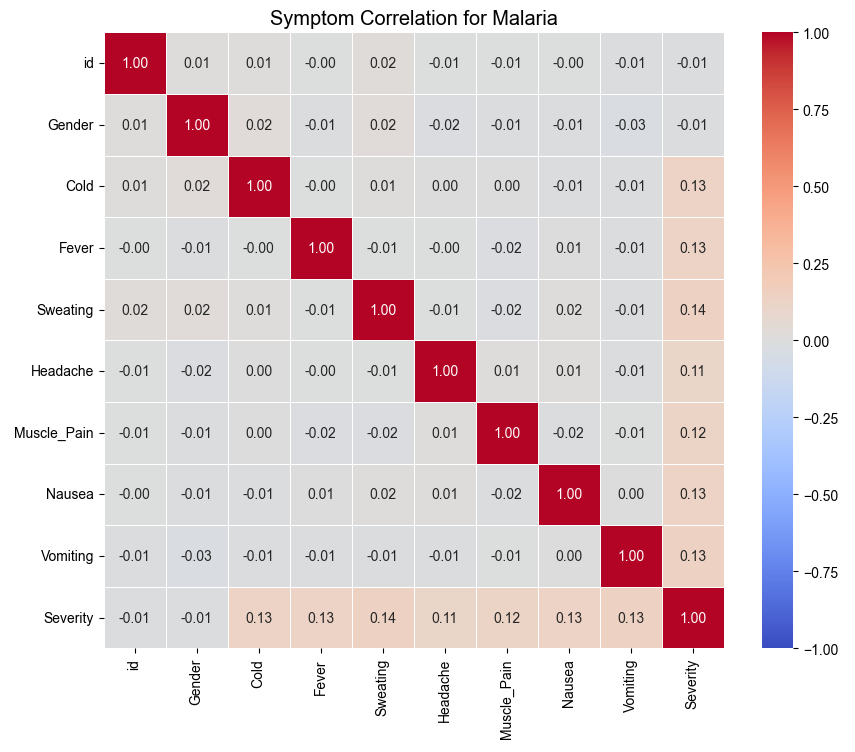

In [8]:
plt.figure(figsize=(10, 8), dpi=100)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)

# Set the font size for the numbers
sns.set(font_scale=1.2)

# Set a title for the heatmap
plt.title("Symptom Correlation for Malaria")

# Show the heatmap
plt.show()

In [9]:
malaria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           5000 non-null   int64
 1   Gender       5000 non-null   int64
 2   Cold         5000 non-null   int64
 3   Fever        5000 non-null   int64
 4   Sweating     5000 non-null   int64
 5   Headache     5000 non-null   int64
 6   Muscle_Pain  5000 non-null   int64
 7   Nausea       5000 non-null   int64
 8   Vomiting     5000 non-null   int64
 9   Severity     5000 non-null   int64
dtypes: int64(10)
memory usage: 390.8 KB
